# Tutorial - Big Data

## Tutorial 7

**Objetivo:**  
Que se familiaricen con los arboles de decisión y clasificación

### Temario:
- Árbol de decisión y clasificación
- Ejemplo práctico con base de Titanic: https://www.kaggle.com/dmilla/introduction-to-decision-trees-titanic-dataset

## ¿Qué es un árbol de decisiones? ¿Cómo funciona?
El árbol de decisiones es un tipo de algoritmo de **aprendizaje supervisado** (que tiene una variable objetivo predefinida) que se utiliza para problemas de **clasificación y de regresión**. Funciona para variables tanto categóricas como continuas. 

En esta técnica, el objetivo es dividir a la población o muestra en dos o más conjuntos (o subpoblaciones) homogéneos en función del atributo más significativo en las variables x. Entonces la pureza del nodo aumenta con respecto a la variable objetivo. El árbol de decisión divide los nodos en todas las variables disponibles y luego selecciona la división que da como resultado los subnodos más homogéneos.

### Tipos de árboles de decisión
Los tipos de árbol de decisión se basan en el tipo de variable objetivo que tenemos. Puede ser de dos tipos:

**1. Árbol de decisión de variable categórica:** Árbol de decisión que tiene una variable de destino categórica y luego se llama como árbol de decisión de variable categórica. Ejemplo: Titanic

**2. Árbol de decisión de variable continua:** El árbol de decisión tiene una variable de destino continua, por lo que se denomina Árbol de decisión de variable continua. Ejemplo: Hitters


### Terminología importante relacionada con los árboles de decisión
Veamos la terminología básica utilizada con los árboles de decisión:

**1.Nodo Base/Raíz (RootNode):** Es el primer nodo. Representa la muestra completa y esto se divide en dos o más conjuntos homogéneos.

**2.Dividir (Splitting):** Es un proceso de dividir un nodo en dos o más subnodos.

**3.Nodo interno o nodo de decisión (Decision Node):** Cuando un subnodo se divide en otros subnodos, se denomina nodo interno o nodo de decisión.

**4. Nodo Terminal/Hojas:** Los nodos que no se dividen se denominan Hoja o nodo Terminal.

**5.Poda (Pruning):** Cuando eliminamos subnodos de un nodo de decisión, este proceso se llama poda. Es decir, el proceso opuesto de la división.

**6 Rama/Subárbol:** Una subsección de todo el árbol se llama rama o subárbol.

**7.Nodo padre e hijo:** Un nodo, que se divide en subnodos, se denomina nodo padre de subnodos, donde los subnodos son los hijos del nodo padre.

En el ejemplo de la base Hitters

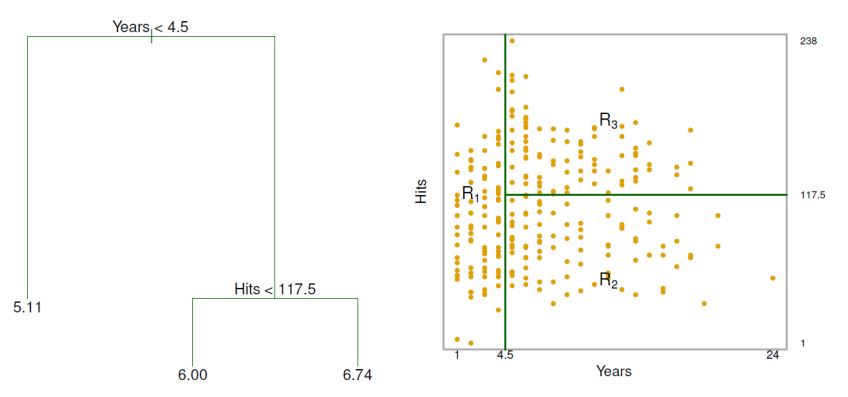


## Ventajas
* **No lineal:** Los árboles son una forma inteligente de representar las no linealidades

* **Fácil de entender y comunicar:** La salida del árbol de decisiones es muy fácil de entender. No requiere ningún conocimiento estadístico.

* **Útil en la exploración de datos:** es la forma más rápida de identificar variables significativas (las de los nodos de más arriba). Con los árboles de decisión podemos crear nuevas variables/ características que tienen mejor poder para predecir la variable objetivo.

* **El tipo de datos no es una restricción:** Puede manejar variables tanto numéricas como categóricas

## Desventajas

* **Ajuste excesivo:** El ajuste excesivo es una de las dificultades más prácticas para el modelo de árbol de decisión. Este problema se resuelve estableciendo restricciones en los parámetros del modelo.

* **Estructura lineal:** Cuando la estructura de los datos es lineal, el arbol no anda bien, porque las variables importan siempre y con CART solo algunas variables importan en cada nodo. 

* **Poco robusto:** Cambios en la base puede generar grandes cambios en el arbol resultante

## Ejercicio: Árbol de decisiones sobre datos del Titanic
En este ejercicio veremos los árboles de decisión utilizando el conjunto de datos Titanic:
1. Aprender a predecir a los sobrevivientes con árboles de decisión
2. Exploración y procesamiento de conjuntos de datos
3. Funciones relevantes para los árboles de decisión
4. Impureza de Gini
5. Encontrar la mejor profundidad de árbol con la ayuda de la validación cruzada
6. Generación y visualización del modelo final


|Variable|Definition|Key|
| --- | --- | --- |
|Survival|Survival|0 = No, 1 = Yes|
|Pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|Sex|Sex||
|Age|Age in years||
|Sibsp|| # of siblings / spouses aboard the Titanic	
|Parch|| # of parents / children aboard the Titanic	
|Ticket|Ticket number||
|Fare|Passenger fare||
|Cabin|Cabin number||
|Embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|


Fuente: [Kaggle](https://www.kaggle.com/c/titanic/data)

### Limpieza de la base de datos del Titanic 

In [1]:
# (Si aún no instalaron alguna librería recuerden primero hacer ese paso)
import os
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [22]:
dir = r"C:\Users\pilih\Documents\UdeSA\Teaching\Maestría Economía\Big Data\Github Big Data\Big-Data-UdeSA\Clases\Tutorial 7"
os.chdir(dir)  

# Cargamos los datos 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Guardamos el ID de los pasajeros del grupo a predecir 
passenger_id = test['PassengerId']

# Copiamos la base para guardar su versión original antes de limpiarla
original_train = train.copy() 

# Info del df
print(train.info())
#print(test.info())
# Miramos las primeras filas del df
train.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
# Definir función para extraer los 'titles' de los nombres de los pasajeros
def get_title(name):
    '''
    input: nombres de los pasajeros, incluyendo el title
    return: title
    '''
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

In [24]:
# Ejemplo
print(train.Name[2])
get_title(train.Name[2])

Heikkinen, Miss. Laina


'Miss'

In [5]:
dummies_train_df = []
dummies_test_df = []

for dataset in [train, test]:
    # Tamaño de la familia
    dataset['Family_Size'] = dataset['SibSp'] + dataset['Parch'] + 1
    # Viaja solo?
    dataset['Alone'] = 0
    dataset.loc[dataset['Family_Size'] == 1, 'Alone'] = 1
    # Tiene cabina?
    dataset['Has_Cabin'] = dataset["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
    
    # Reemplazamos los missings en Embarked con la opción más común #train.groupby(['Embarked']).count()
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    # Reemplazamos los missings en Fare con la mediana
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
    # Imputamos los nulls en la edad con valores aleatorios entre la media +- 1 SD
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset.loc[np.isnan(dataset['Age']), 'Age'] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    # Nueva columna con titles
    dataset['Title'] = dataset['Name'].apply(get_title)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],
                                                'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs') 
    # Convertimos Sex en numerica
    dataset['Male'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    if dataset is train:
        # Convertimos Title en dummies  
        #print(train['Title'].value_counts())
        titles_train = pd.get_dummies(train['Title'], drop_first=True)
        dummies_train_df.append(titles_train)
        # Convertimos Embarked en dummies
        embarked_train = pd.get_dummies(train['Embarked'], drop_first=True)
        dummies_train_df.append(embarked_train)
    else:
        titles_test = pd.get_dummies(test['Title'], drop_first=True)
        dummies_test_df.append(titles_test)
        embarked_test = pd.get_dummies(test['Embarked'], drop_first=True)
        dummies_test_df.append(embarked_test)

In [6]:
dummies_train_df

[      Miss     Mr    Mrs   Rare
 0    False   True  False  False
 1    False  False   True  False
 2     True  False  False  False
 3    False  False   True  False
 4    False   True  False  False
 ..     ...    ...    ...    ...
 886  False  False  False   True
 887   True  False  False  False
 888   True  False  False  False
 889  False   True  False  False
 890  False   True  False  False
 
 [891 rows x 4 columns],
          Q      S
 0    False   True
 1    False  False
 2    False   True
 3    False   True
 4    False   True
 ..     ...    ...
 886  False   True
 887  False   True
 888  False   True
 889  False  False
 890   True  False
 
 [891 rows x 2 columns]]

In [7]:
# Eliminamos variables irrelevantes y unimos con las tablas de dummies
# Decidí eliminar 'Mr' porque en el heatmap observé que estaba altísimamente correlacionado con sexo.
drop_elements = ['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'SibSp', 'Embarked', 'Title']

train = pd.concat([train, dummies_train_df[0], dummies_train_df[1]], axis=1)
train = train.drop(drop_elements, axis = 1)
train.columns = train.columns.str.lower()

test = pd.concat([test, dummies_test_df[0], dummies_test_df[1]], axis=1)
test = test.drop(drop_elements, axis = 1)
test.columns = test.columns.str.lower()

train.head(5)

,survived,pclass,age,parch,fare,family_size,alone,has_cabin,male,miss,mr,mrs,rare,q,s
0,0,3,22,0,7.2500,2,0,0,1,False,True,False,False,False,True
1,1,1,38,0,71.2833,2,0,1,0,False,False,True,False,False,False
2,1,3,26,0,7.9250,1,1,0,0,True,False,False,False,False,True
3,1,1,35,0,53.1000,2,0,1,0,False,False,True,False,False,True
4,0,3,35,0,8.0500,1,1,0,1,False,True,False,False,False,True


In [8]:
test.head()

,pclass,age,parch,fare,family_size,alone,has_cabin,male,miss,mr,mrs,rare,q,s
0,3,34,0,7.8292,1,1,0,1,False,True,False,False,True,False
1,3,47,0,7.0000,2,0,0,0,False,False,True,False,False,True
2,2,62,0,9.6875,1,1,0,1,False,True,False,False,True,False
3,3,27,0,8.6625,1,1,0,1,False,True,False,False,False,True
4,3,22,1,12.2875,3,0,0,0,False,False,True,False,False,True


In [9]:
# Probamos que no hayan quedado missing values:
columns_with_nan = train.columns[train.isna().any()].tolist()
print("Columns with NaN values:", columns_with_nan)
columns_with_nan = test.columns[test.isna().any()].tolist()
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: []
Columns with NaN values: []


## Visualización de la base procesada

### Heatmap
Este mapa de calor es muy útil como observación inicial porque permite hacerse una idea del valor predictivo de cada feature. El valor del mapa de calor se sitúa entre (-1,0) y (0,-1). A medida que aumenta el valor (en términos absolutos), aumenta la correlación entre los atributos.

<Axes: title={'center': 'Pearson Correlation of Features'}>

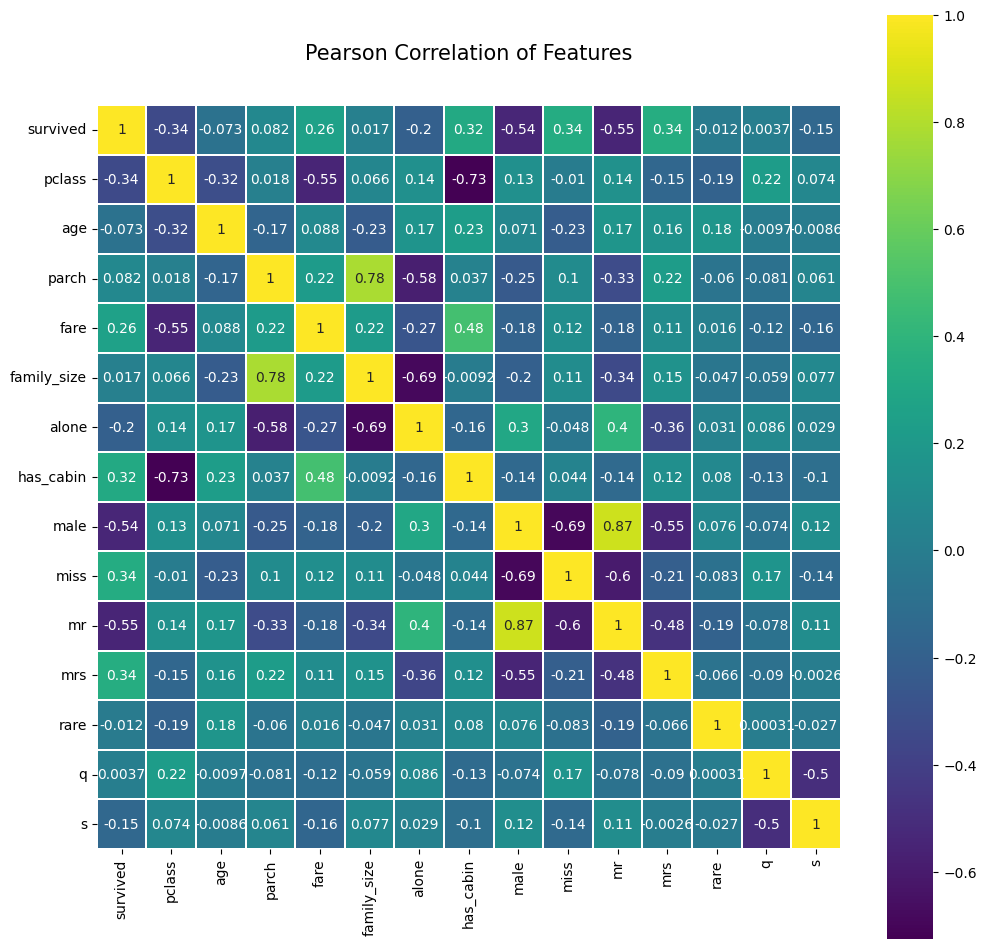

In [10]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),
            linewidths=0.1,
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white', 
            annot=True)

### ¿Cómo decide un árbol dónde dividirse?
Los árboles de decisión utilizan distintos algoritmos para decidir cómo dividir un nodo en dos o más subnodos. La creación de subnodos aumenta la homogeneidad de los subnodos resultantes. En otras palabras, podemos decir que la pureza del nodo aumenta con respecto a la variable objetivo. El árbol divide los nodos en todas las variables disponibles y luego selecciona la división que da como resultado los subnodos más homogéneos.


#### Índice de Gini
El Gini da una medida de la impureza de un nodo. Se calcula como:

$Gini =  \sum \limits _{k=1} ^{K} \hat{p}_{mk} (1-\hat{p}_{mk}) $

donde $\hat{p}_{mk}$ es la proporción de observaciones que en el dataset de entrenamiento en la región m de la clase k. 

Por la forma en la que está construido este índice, su valor será menor cuando $\hat{p}_{mk}$ se acerque a 1 o a 0 (es decir, cuando las observaciones del nodo son más parecidas). Cuanto menor sea el valor de Gini, menor será la desigualdad. Los árboles de decisión intentarán encontrar la división que reduzca más la Impureza de Gini en los dos nodos resultantes.

In [11]:
# Definimos la función de la impureza de Gini 
def get_gini_impurity(survived_count, total_count):
    survival_prob = survived_count/total_count
    not_survival_prob = (1 - survival_prob)
    random_observation_survived_prob = survival_prob
    random_observation_not_survived_prob = (1 - random_observation_survived_prob)
    mislabelling_survived_prob = not_survival_prob * random_observation_survived_prob
    mislabelling_not_survived_prob = survival_prob * random_observation_not_survived_prob
    gini_impurity = mislabelling_survived_prob + mislabelling_not_survived_prob
    return gini_impurity

In [12]:
train.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [13]:
# Gini Impurity en nodo inicial
survived = train.survived.value_counts()[1]
total = len(train)
gini_impurity_starting_node = get_gini_impurity(survived, total)
gini_impurity_starting_node

np.float64(0.47301295786144265)

In [14]:
original_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).agg(['mean', 'count', 'sum'])

Sex  Survived           
               mean count  sum
0  female  0.742038   314  233
1    male  0.188908   577  109

In [15]:
# Gini Impurity si hicieramos la partición según sexo
gini_impurity_starting_node_male = get_gini_impurity(109, 577)
gini_impurity_starting_node_female = get_gini_impurity(233, 314)
print(gini_impurity_starting_node_male, gini_impurity_starting_node_female)

0.3064437162277843 0.3828350034484158


Para estimar el modelo vamos a usar [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) de Scikit Learn

También usaremos CV para elegir el hiperparámetro de la profundidad del árbol (max_depth). Este hiperparámetro determina el número máximo de atributos que consideran para cada predicción (siendo el máximo la cantidad de features disponibles en el dataset).

In [16]:
X = train.drop(['survived'], axis=1)
y = train["survived"]       

In [17]:
cv = KFold(n_splits=10, shuffle = True, random_state=10)            
accuracies = []
max_attributes = len(test.columns)
depth_range = range(1, max_attributes + 1)   # Recuerdan por qué +1?

for depth in depth_range:
    fold_accuracy = []
    tree_model = DecisionTreeClassifier(max_depth = depth)
    
    # print("Current max_depth: ", depth, "\n")
    
    for i, (train_index, valid_index) in enumerate(cv.split(X)):   
        x_train, x_valid = X.loc[train_index], X.loc[valid_index] 
        y_train, y_valid = y.loc[train_index], y.loc[valid_index] 
    
        model = tree_model.fit(x_train, y_train) 
        valid_acc = model.score(x_valid, y_valid)
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    #print("Accuracy per fold: ", fold_accuracy, "\n")
    #print("Average accuracy: ", avg)
    #print("\n")

df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.777728
         2          0.785593
         3          0.823845
         4          0.826067
         5          0.809201
         6          0.817029
         7          0.801373
         8          0.806954
         9          0.811461
        10          0.806966
        11          0.809189
        12          0.799101
        13          0.799114
        14          0.797978


Podemos concluir que el hiperparámetro óptimo es max_length=3. Estimamos el modelo final con ese hiperparámetro

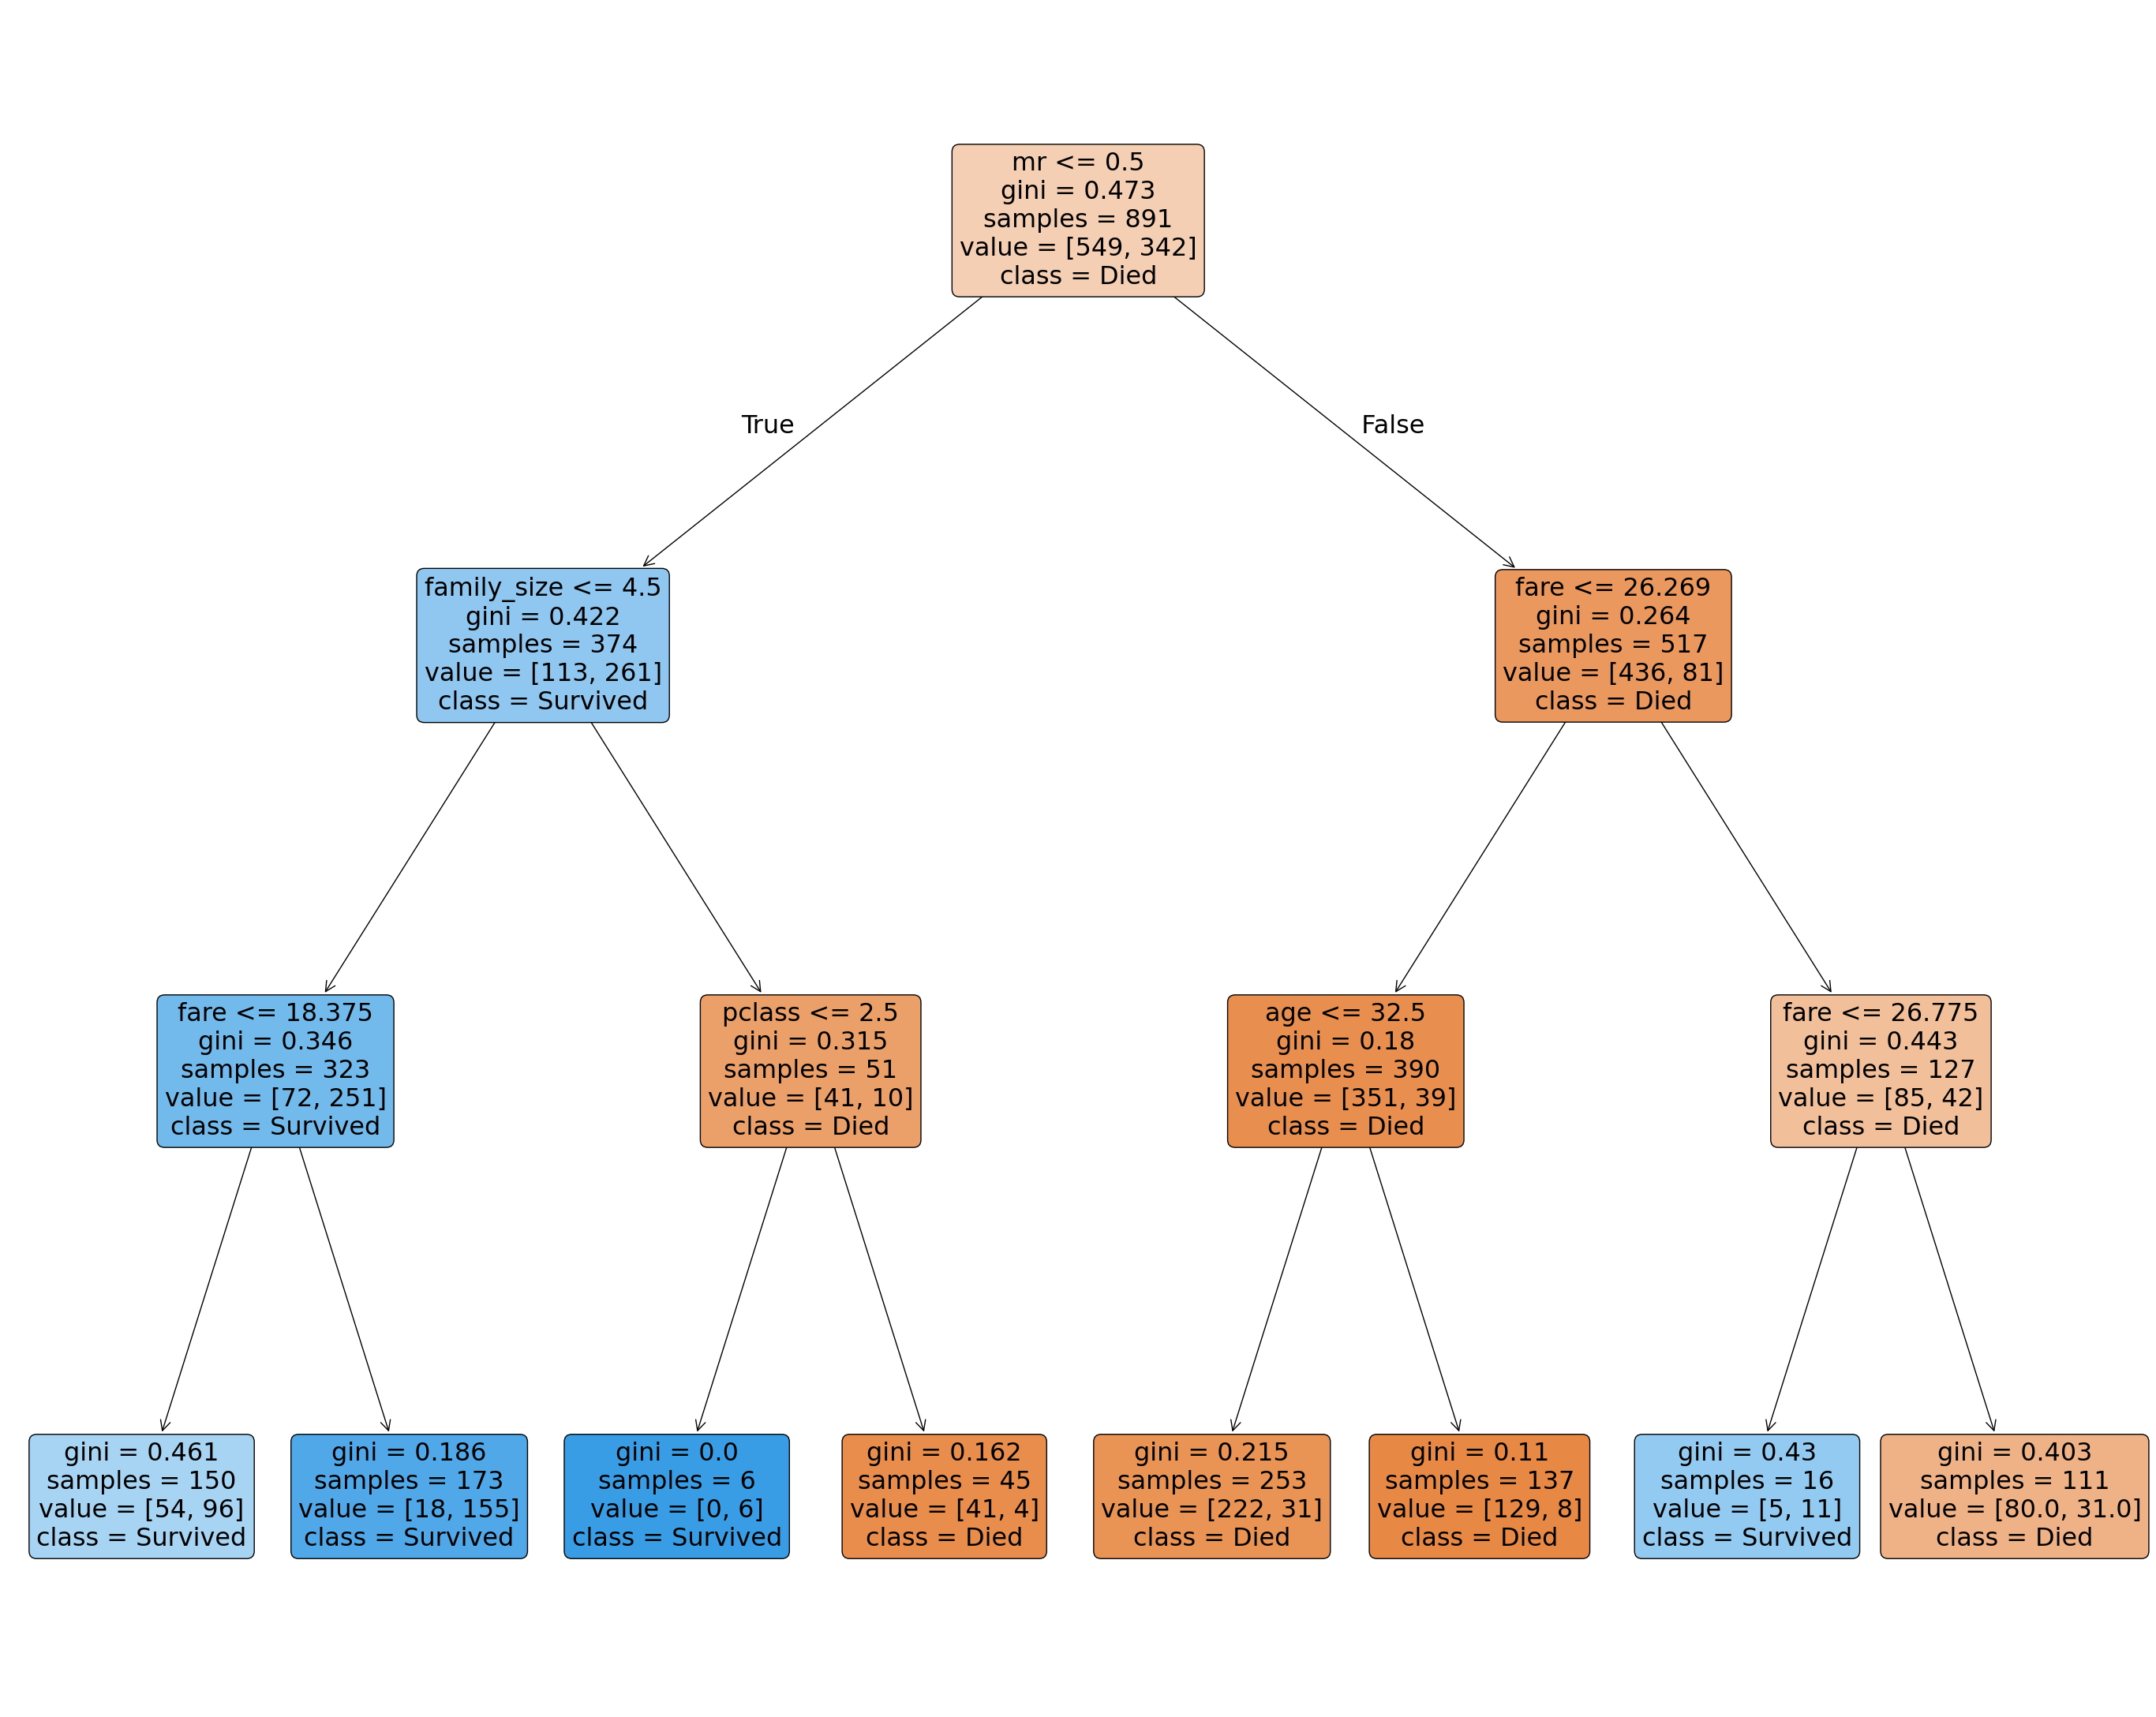

In [18]:
# Creamos un arbol con max_depth = 3
decision_tree = DecisionTreeClassifier(max_depth = 3).fit(X, y)

# Datos de test
test = test.dropna()  
X_test = test

# Predicción sobre los datos de test
y_pred = decision_tree.predict(X_test)
submission = pd.DataFrame({"passengerId": passenger_id, "survived": y_pred})
#Acá deberíamos calcular la precisión del modelo final con la base de test. Pero
#como estamos trabajando con la base de datos de la competencia, la y_test no la
#hicieron pública. El resultado final a entregar era la predicción de sobrevivientes
#sobre los ID de los pasajeros. 

# Gráfico
fig = plt.figure(figsize=(35,28))
graph = plot_tree(decision_tree,
                  max_depth = 3,
                  impurity = True,   #mostrar impurity
                  feature_names = list(train.drop(['survived'], axis=1)),
                  class_names = ['Died', 'Survived'],
                  rounded = True, 
                  filled = True   #colorear los nodos p/ indicar la clase mayoritaria (p/ clasif.)
                 )
fig.savefig("Tree_titanic.pdf",bbox_inches='tight')


En cada recuadro tenemos:
1. splitting condition
2. Gini impurity of the node
3. Samples: cantidad de observaciones en el nodo
4. Value: Cantidad de observaciones clasificadas como 'Died' y 'Survived'
5. Class: etiqueta de cada nodo, lo que clasificamos en c/u. 
El color representa la clase y la saturación aumenta a medida que el Gini es menor (mayor % de observaciones clasificadas igual).

Recordar: en un árbol de clasificación predecimos que una observación pertenece a la clase más recurrente dentro del nodo terminal al que pertenece (por ej., si para una observación determinada, la mayor parte de las observaciones del nodo al que pertenece son y=sobrevivió, para esa observación -y todas las de ese nodo- nuestra predicción será 'Sobrevivió')

In [19]:
acc_decision_tree = decision_tree.score(x_train, y_train)
acc_decision_tree

0.8254364089775561